# **Clustering and Dimension Reduction (~ 75 min)**

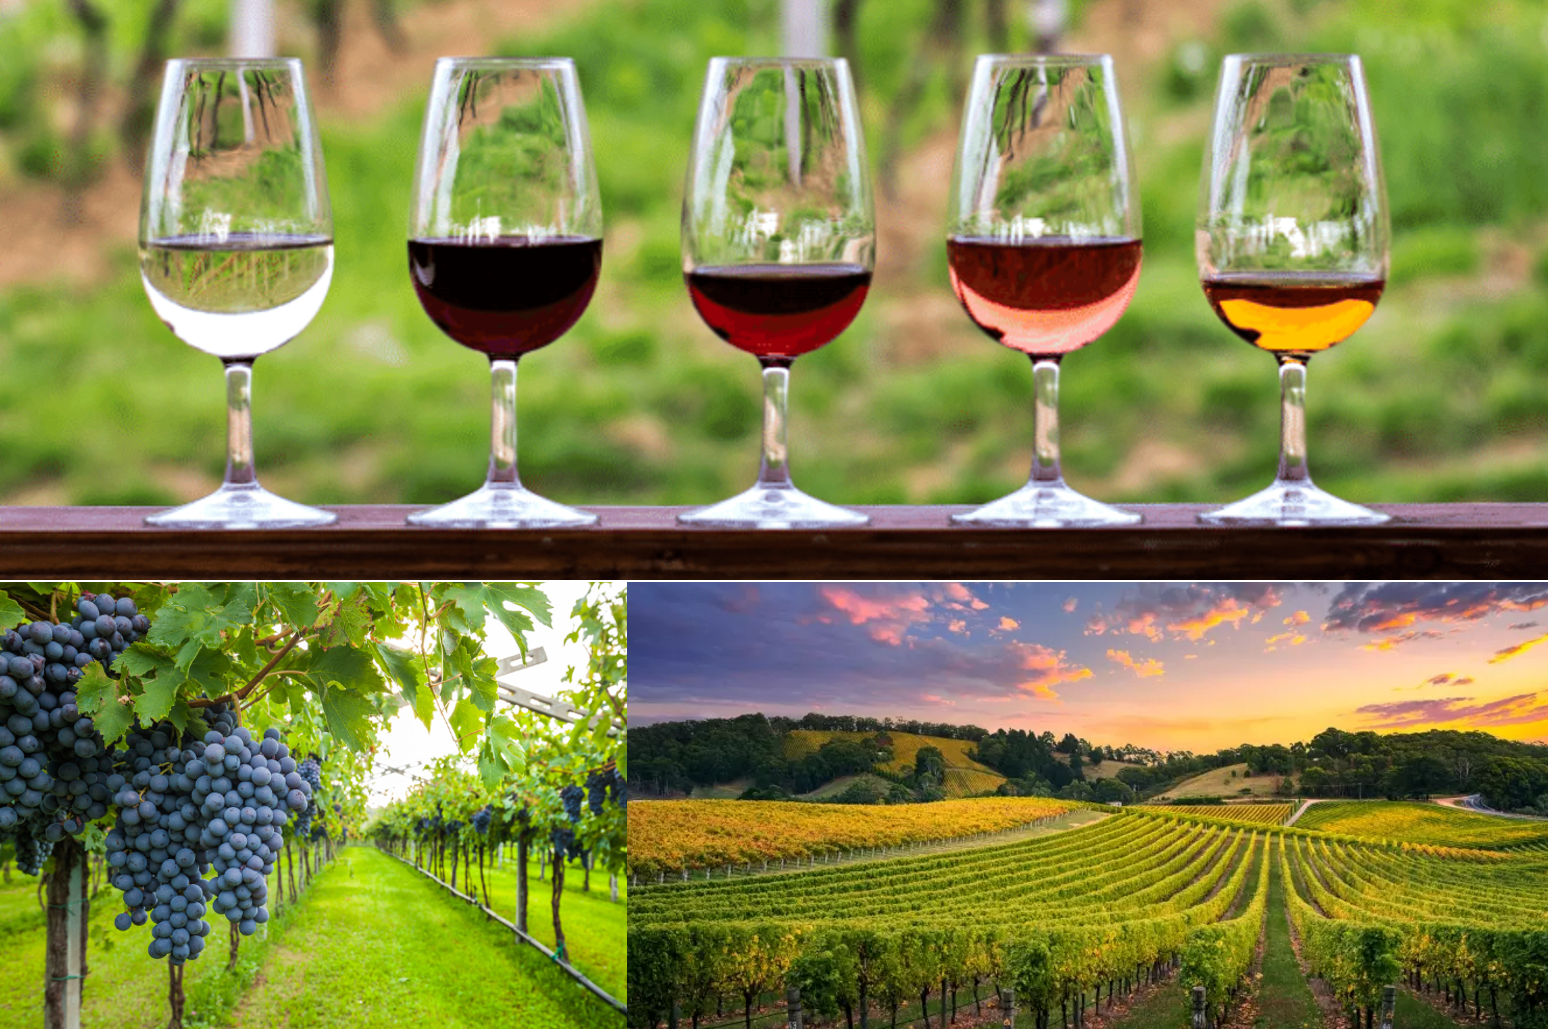

In this notebook, we will delve into and work with the sk-learn Wine dataset, a classic dataset frequently employed in the realm of machine learning for classification tasks. The Wine dataset comprises 178 samples, each characterized by 13 distinct features representing various chemical analyses of Italian wines originating from three different cultivars. These features encompass a range of chemical properties such as alcohol content, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavonoids, nonflavonoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline. The primary aim in this notebook is we go through the clustering and dimensionality reduction techniques.


Our first objective will be to learn how to effectively cluster the samples in this dataset using the K-means function. This technique will involve grouping the wine samples based on their chemical properties, aiming to identify inherent structures within the data. Following the clustering process, we will shift our attention to evaluating the performance of our clustering function. Finally, we will explore three different methods of dimensionality reduction. These techniques are instrumental in simplifying the complexity of our dataset while retaining as much of the significant information as possible. By applying these methods, we aim to gain a clearer, more accessible low-dimensional space visualization of the features within the Wine dataset. This step is essential for better understanding the relationships between different variables and for making our dataset more manageable for further analysis and interpretation.

## Importing necessary libraries and Loading Data (5 min):

1. Umap library is not pre-installed on your notebook. Install it with `!pip`.

2. Get to know the required libraries, and use an abreviation to further call them.

3. Load the dataset with help of the fucntion `load_wine()`. Determine the number of distinct classes included. To get an initial overview, use `df.columns` and `pd.head()` to display the feature names and the first 5 records of the dataset.

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f22981be4586100222f025fb0ac3bb578a7fe363a2d7c486b253ad2b5247c80d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as # ... Your code goes here
import plotly.express as # ... Your code goes here

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

from sklearn.decomposition import # ... Your code goes here
from sklearn.manifold import # ... Your code goes here
import # ... Your code goes here

SyntaxError: ignored

In [ ]:
df = # ... Your code goes here
df = df.frame
# print the shape of the dataset, the list of columns name, and the first 5 rows of dataset
print(df.shape)
print(list(df.columns))
df.head()

## Data Standardization (5 min):

The StandardScaler().fit_transform(df) method from the scikit-learn library is essential for normalizing the features in your dataset, ensuring that each feature contributes equally to the analysis. This method standardizes the features by removing the mean and scaling to unit variance, which is crucial in algorithms like K-means that are sensitive to the scale of the data. By applying this transformation, it helps in improving the performance and accuracy of machine learning models, as they are not biased or skewed by the natural variance in the dataset.

1. Standardize data faetures with sk-learn functions `StandardScaler().fit_transform(df)`.

2. print out the first 5 rows of data and compare them with the data before the standardization

In [ ]:
# features = StandardScaler().fit_transform(df)
scaler = # ... Your code goes here
features = # ... Your code goes here
features = # ... Your code goes here
# Convert to pandas Dataframe
scaled_df = pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(5)

## K-mean and Elbow Method

Plotting the elbow curve for K-means clustering is essential to determine the optimal number of clusters (k) for the dataset. The curve, which plots the number of clusters against a measure of cluster quality (like WCSS: Within-Cluster Sum of Squares), typically shows a point where the rate of decrease sharply changes, known as the 'elbow'. This point signifies where adding more clusters does not significantly improve the clustering quality, thus providing a balance between the complexity of the model and the adequacy of the cluster representation.

1. For num of clusters 1 to 10, plot the elbow curve for kmeans clustering, and choosing a final num of cluster
2. Evaluate your kmeans with `kmeans.inertia_`. Make WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
3. Use NMI `normalized_mutual_info_score()` to again evaluate your k-means. Explain what WCSS and NMI are.

In [ ]:
# for num of clusters 1 to 10, plot the elbow curve
X = scaled_df.values
# WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
wcss = {}
for i in range(1, 11):
    kmeans = # ... Your code goes here
    kmeans.fit(X)
    wcss[i] = # ... Your code goes here


plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

# according to the plot, choose the suitable number of clusters and fit the model
kmeans = # ... Your code goes here
kmeans.fit(X)
print(kmeans.cluster_centers_.shape) # (3, 13)
print(kmeans.cluster_centers_) # 3 clusters, 13 features
print(kmeans.labels_) # 178 samples, each sample belongs to one of the 3 clusters


labels = # ... Your code goes here
true_labels = # ... Your code goes here
kmeans_labels = labels
nmi_score = # ... Your code goes here
print("NMI Score: ", nmi_score)

## Dimension Reduction


Dimensionality reduction of data features is a critical process in data analysis and machine learning, particularly when dealing with high-dimensional datasets. Here's why it's important and the differences between PCA, t-SNE, and UMAP:
Importance of Dimensionality Reduction:
- Reduces Computational Complexity: By lowering the number of features, it makes algorithms faster and less computationally expensive.
- Mitigates the Curse of Dimensionality: High-dimensional spaces often lead to issues like overfitting and sparsity of data; reducing dimensions can alleviate these problems.
- Finally, improves Data Visualization: It's easier to visualize and interpret data in two or three dimensions than in higher-dimensional spaces.

PCA (Principal Component Analysis):

Linear Technique: PCA is a linear algorithm that identifies the directions (principal components) in which the data varies most.
Global Structure Preservation: It's effective in preserving the global structure of the data but might not capture complex, nonlinear relationships.
Scalability and Interpretability: PCA scales well with large datasets and the components can often be interpreted in terms of the original features.

Differences between PCA, t-SNE, and UMAP:

1. Reduce the dimension of the features to 2 with the imported PCA funciton `PCA()`
2. Visualize the samples in 2D together with the centroids that have been created by Kmean with 3 clusters. Remember you need to reduce the features of centroids as well to be able to visualize them in 2D.

In [ ]:
pca = # ... Your code goes here
reduced_X = pd.DataFrame(...) # ... Your code goes here
print(reduced_X.head())
# reduced centers features after PCA
centers = pca.transform(...) # ... Your code goes here
centers


# Scatter plot of the reduced data
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('dim1_after_PCA')
plt.ylabel('dim2_after_PCA')
plt.title('Wine Clusters')
plt.tight_layout()

## Transforming Features of one Sample to Low-dimension Space: 10 min

This exercise aims to familiarize you with the process of transforming a high-dimensional data sample into a lower-dimensional space using PCA. You will be working with a sample containing 13 features, projecting it to a 2D space.



To project a sample from a 13-dimensional space to a 2-dimensional space using a transformation matrix, you typically employ a method like Principal Component Analysis (PCA). Here's a simplified overview of the mathematics behind this process:

1. **PCA Transformation Matrix:**
   - PCA begins by calculating the eigenvectors and eigenvalues from the covariance matrix of the data. These eigenvectors are the principal components.
   - In this case, to project down to 2D, you select the first two principal components.
   - Let's say your PCA transformation matrix \( T \) is composed of these two principal components, each being a 13-dimensional vector. So, \( T \) will be a matrix of size \( 2 \times 13 \).

2. **Sample in 13-Dimensional Space:**
   - Assume your sample in the 13-dimensional space is a vector \( X \) of size \( 13 \times 1 \).

3. **Projection to 2D:**
   - The projection of \( X \) into the new 2D space is achieved by multiplying the transformation matrix \( T \) with the sample vector \( X \).
   - Mathematically, it's represented as \( Y = TX \), where \( Y \) is your new 2-dimensional representation of the sample.
   - In terms of matrix dimensions, it looks like \( (2 \times 13) \times (13 \times 1) = (2 \times 1) \). So, \( Y \) is a 2-dimensional vector.

4. **Matrix Multiplication:**
   - The actual computation involves the dot product between each row of \( T \) and \( X \). Each element of \( Y \) is a sum of the products of corresponding elements from the row of \( T \) and \( X \).

5. **Result:**
   - The resulting 2D vector \( Y \) represents your original 13-dimensional sample projected onto the space defined by the first two principal components. This 2D representation captures the most significant variance of the original data in two dimensions.

This process effectively reduces the dimensionality of the data while retaining the most critical information, as captured by the first two principal components. Now follow the steps bellow for the implementation details:

1. Choose a random sample form the dataset.
2. Use `pca.transform` to transform the 13 features of that sample to 2D.
3. Plot a heatmap of the transform matrix `pca.components`.  
4. Considering the transform matrix `pca.components` and the dot product function `np.dot` try to find the sample projection in 2D.

In [ ]:
# Heat map c
pca.components_.shape
component_df = pd.DataFrame(...) # ... Your code goes here
sns.heatmap(component_df)
plt.show()
print(pca.components_)

# use the PCA transfer matrix to transform the sample to low dim space
sample = df.sample(1)
sample_transformed = # ... Your code goes here

pca_transfer_Matrix = # ... Your code goes here
pca_transfer_Matrix = # ... Your code goes here

sample_2component = np.dot(...) # ... Your code goes here

print('----')
print(sample_transformed)
print(sample_2component)

## Dimension Reduction with PCA: 5 min
1. Repeat the reduciton of feature dimension this time to 3. Again using the the imported PCA funciton `PCA()`
2. Visualize the 3D components of samples.
3. Also use the interactive visualization library.

In [ ]:
# Perform PCA for visualization with 3 components
pca = PCA(...) # ... Your code goes here
X_pca = # ... Your code goes here

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# in the scatter plot bellow, GIVE EACH SAMPLE A COLOR ACCORDING TO ITS TARGET VALUE
scatter = ax.scatter(...) # ... Your code goes here

plt.colorbar(scatter, label='Digit')
ax.set_title('PCA Visualization of Wine Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

fig = px.scatter_3d(...) # ... Your code goes here
fig.show()


## t-SNE (t-Distributed Stochastic Neighbor Embedding):

Non-Linear Technique: t-SNE is a nonlinear, probabilistic technique primarily used for visualizing high-dimensional data in 2D or 3D.
Local Structure Preservation: It excels at revealing the local structure and clustering in data, often at the cost of global structure.
Computational Complexity: t-SNE can be computationally intensive, especially on large datasets, and its results can vary based on the chosen parameters.

1. Reduce the dimension of the features to 2 with the imported `TSNE()` funciton
2. Visualize the samples in 2D.

In [ ]:
# Perform t-SNE
tsne = # ... Your code goes here
X_tsne = # ... Your code goes here

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(...) # ... Your code goes here
plt.colorbar()
plt.title('t-SNE Visualization of Wine Data')
plt.show()


## UMAP (Uniform Manifold Approximation and Projection):

Non-Linear Technique: Like t-SNE, UMAP is a nonlinear method, but it's based on manifold learning with superior scalability. Balance Between Local and Global Structure: UMAP preserves more of the global structure than t-SNE, while also unfolding local structures. Versatility and Speed: It works faster than t-SNE on large datasets and can be applied more broadly, including in tasks beyond visualization, like supervised dimensionality reduction.

1. Reduce the dimension of the features to 2 with the imported `umap.UMAP()` funciton
2. Visualize the samples in 2D.

In [ ]:
# Perform UMAP dimensionality reduction
reducer = # ... Your code goes here
embedding = # ... Your code goes here

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(...) # ... Your code goes here
plt.colorbar()
plt.title('UMAP Visualization of Wine Data')
plt.show()

## PCA, t-SNE, Umap
Each of these methods has its strengths and is suited to different types of datasets and analysis goals. PCA is often the first choice for linear dimensionality reduction and overview analysis, while t-SNE and UMAP are more suited for detailed exploratory analysis, especially when the data has complex, nonlinear relationships.